<a href="https://colab.research.google.com/github/EASWAR17/mnist-classification/blob/main/dl_ex_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import utils
import pandas as pd
from sklearn.metrics import classification_report,confusion_matrix
from tensorflow.keras.preprocessing import image

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
X_train.shape

(60000, 28, 28)

In [4]:
X_test.shape

(10000, 28, 28)

In [5]:
single_image= X_train[0]


In [6]:
single_image.shape


(28, 28)

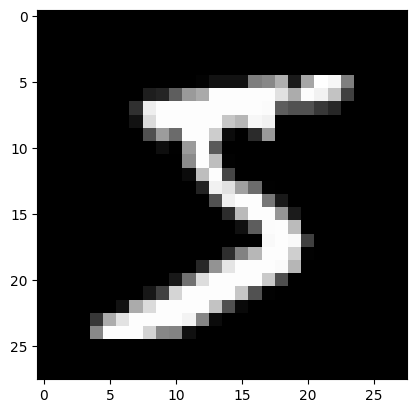

In [7]:
plt.imshow(single_image,cmap='gray')

In [8]:

y_train.shape


(60000,)

In [9]:

X_train_scaled = X_train/255.0
X_test_scaled = X_test/255.0

In [10]:

y_train[0]

5

In [11]:

y_train_onehot = utils.to_categorical(y_train,10)
y_test_onehot = utils.to_categorical(y_test,10)

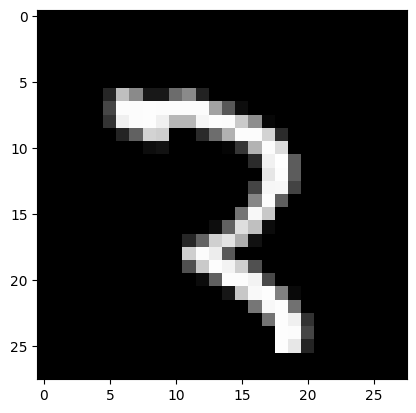

In [12]:

single_image = X_train[500]
plt.imshow(single_image,cmap='gray')

In [13]:

y_train_onehot[500]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [14]:
X_train_scaled = X_train_scaled.reshape(-1,28,28,1)
X_test_scaled = X_test_scaled.reshape(-1,28,28,1)

In [15]:
model= keras.Sequential()
model.add(layers.Input(shape=(28,28,1)))
model.add(layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(32,activation='relu'))
model.add(layers.Dense(10,activation='softmax'))

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 32)                173088    
                                                                 
 dense_1 (Dense)             (None, 10)                330       
                                                                 
Total params: 173738 (678.66 KB)
Trainable params: 173738 (678.66 KB)
Non-trainable params: 0 (0.00 Byte)
________________

In [17]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics='accuracy')
model.fit(X_train_scaled ,y_train_onehot, epochs=8,batch_size=128, validation_data=(X_test_scaled,y_test_onehot))

Epoch 1/8
469/469 [==============================] - 24s 48ms/step - loss: 0.3060 - accuracy: 0.9130 - val_loss: 0.1255 - val_accuracy: 0.9630
Epoch 2/8
469/469 [==============================] - 22s 46ms/step - loss: 0.1021 - accuracy: 0.9707 - val_loss: 0.0783 - val_accuracy: 0.9758
Epoch 3/8
469/469 [==============================] - 22s 47ms/step - loss: 0.0687 - accuracy: 0.9798 - val_loss: 0.0576 - val_accuracy: 0.9815
Epoch 4/8
469/469 [==============================] - 20s 43ms/step - loss: 0.0524 - accuracy: 0.9848 - val_loss: 0.0612 - val_accuracy: 0.9797
Epoch 5/8
469/469 [==============================] - 22s 46ms/step - loss: 0.0441 - accuracy: 0.9866 - val_loss: 0.0507 - val_accuracy: 0.9829
Epoch 6/8
469/469 [==============================] - 20s 44ms/step - loss: 0.0357 - accuracy: 0.9893 - val_loss: 0.0454 - val_accuracy: 0.9847
Epoch 7/8
469/469 [==============================] - 34s 72ms/step - loss: 0.0302 - accuracy: 0.9909 - val_loss: 0.0460 - val_accuracy: 0.9843

In [18]:
metrics = pd.DataFrame(model.history.history)
metrics.head()

,loss,accuracy,val_loss,val_accuracy
0,0.305951,0.913033,0.125534,0.9630
1,0.102117,0.970667,0.078278,0.9758
2,0.068670,0.979783,0.057648,0.9815
3,0.052361,0.984800,0.061200,0.9797
4,0.044143,0.986633,0.050697,0.9829


<Axes: >

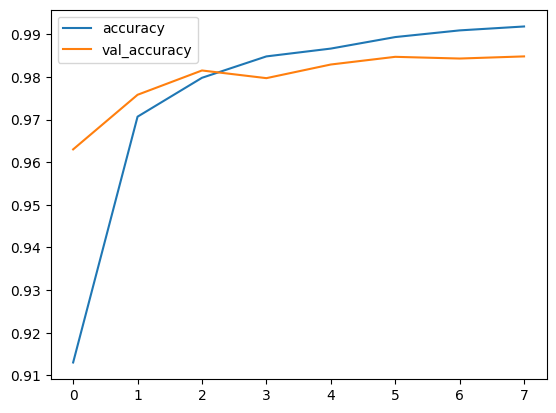

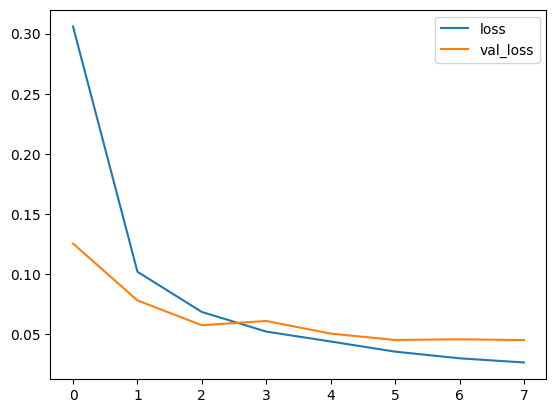

In [19]:
metrics[['accuracy','val_accuracy']].plot()
metrics[['loss','val_loss']].plot()

In [20]:
x_test_predictions = np.argmax(model.predict(X_test_scaled), axis=1)
print(confusion_matrix(y_test,x_test_predictions))

313/313 [==============================] - 2s 7ms/step
[[ 970    0    4    1    2    1    1    0    0    1]
 [   0 1133    2    0    0    0    0    0    0    0]
 [   2    7 1011    3    2    0    0    5    2    0]
 [   0    0    0 1001    0    7    0    0    2    0]
 [   0    2    4    0  967    0    1    1    2    5]
 [   1    0    1    6    0  882    2    0    0    0]
 [   4    3    0    1    3    6  939    0    2    0]
 [   0    3   11    2    0    0    0 1010    1    1]
 [   2    0    4    3    0    1    0    3  957    4]
 [   1    3    1    3    6    6    0    9    2  978]]


In [21]:
print(classification_report(y_test,x_test_predictions))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.98      1.00      0.99      1135
           2       0.97      0.98      0.98      1032
           3       0.98      0.99      0.99      1010
           4       0.99      0.98      0.99       982
           5       0.98      0.99      0.98       892
           6       1.00      0.98      0.99       958
           7       0.98      0.98      0.98      1028
           8       0.99      0.98      0.99       974
           9       0.99      0.97      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [47]:
#Prediction for a single input



In [39]:
img = image.load_img('two.jpeg')
img_tensor = tf.convert_to_tensor(np.asarray(img))
img_28 = tf.image.resize(img_tensor,(28,28))
img_28_gray = tf.image.rgb_to_grayscale(img_28)
img_28_gray_scaled = img_28_gray.numpy()/255.0


In [40]:
x_single_prediction = np.argmax(
    model.predict(img_28_gray_scaled.reshape(1,28,28,1)),
     axis=1)

1/1 [==============================] - 0s 32ms/step


In [41]:
print(x_single_prediction)

[2]


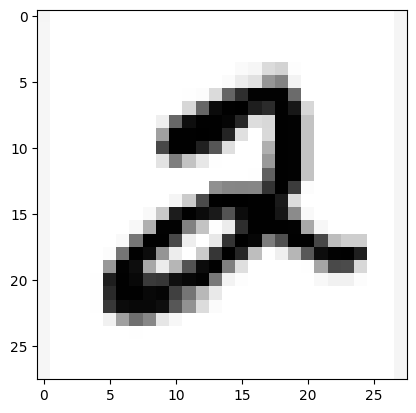

In [42]:
plt.imshow(img_28_gray_scaled.reshape(28,28),cmap='gray')

In [43]:
img_28_gray_inverted = 255.0-img_28_gray
img_28_gray_inverted_scaled = img_28_gray_inverted.numpy()/255.0

In [45]:
x_single_prediction = np.argmax(
    model.predict(img_28_gray_inverted_scaled.reshape(1,28,28,1)),
     axis=1)

1/1 [==============================] - 0s 24ms/step


In [46]:
print(x_single_prediction)

[2]
